# Gradient descent for linear models
In this notebook, I implement a method for performing gradient descent to estimate the parameters for a linear regression model using mean squared error (MSE) as the cost function.

Author: [Ryan Parker](https://github.com/rparkr)

# Setup: library imports

In [1]:
import matplotlib.pyplot as plt  # general purpose plotting
import numpy as np  # numerical computation on arrays
from tqdm import tqdm  # progress bars
from sklearn.datasets import make_regression  # dataset generation

# Gradient descent algorithm
This implementation uses the partial derivatives of:
- the weight vector $w$
- the bias $b$

with respect to the loss function (mean squared error), which is defined as:

$$\frac{1}{2m} \sum_{i=0}^{m} (\hat{y}_i - y_i)^{2}$$

where:
- $m$ = the number of training samples
- $y$ = the target array
- $\hat{y}$ = the model's prediction, calculated as $w•x + b$ (the dot product of weights with the inputs plus the bias)
 - $w$ = the weight vector, or the coefficients of each of the features (input columns)
 - $x$ = the set of inputs
 - $b$ = the bias

> Note: the actual mean-squared error would divide the sum by the number of samples, $\frac{1}{m}$, but I scale the mean-squared error by a factor of 1/2 (that is: $\frac{1}{2m}$) so the $2$ cancels out when taking the partial derivative. See the function below.

The partial derivates of the loss function (above) are:

**Partial derivative of the loss function $f$ with respect to the weights $w$:**  
$$\frac{\partial f}{\partial w} = \frac{1}{m}  \sum_{i=0}^{m} (\hat{y}_i - y_i) \  x_i $$

**Partial derivative of the loss function $f$ with respect to the bias $b$:**  
$$\frac{\partial f}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m} (\hat{y}_i - y_i)$$

In the cell below, I implement all three of those functions using vectorized operations in NumPy.

In [2]:
def compute_loss(x_input, y_target, weights, bias):
    '''Return the mean squared error based on an input, target, coefficients, and bias.
    
    Parameters:
    ----------
    x_input: array of shape (m_samples, n_features)
        Inputs to the linear regression model.
    y_target: array of shape (m_samples,)
        The targets to predict.
    weights: array of shape (n_features,)
        The coefficients for the input features.
    bias: float
        An adjustment factor, the _b_ in y = wx + b.

    Returns:
    -------
    loss: float
        A measure of the average distance between predicted and target values.
    '''
    num_samples = x_input.shape[0]
    y_hat = np.dot(x_input, weights) + bias
    return np.sum((y_hat - y_target) ** 2) / (2 * num_samples)  # Dividing by 2m is the same as multiplying by (1/2m)


def gradient_descent(x_input, y_target, weights, bias, alpha=0.01):
    '''Compute the gradient and take a step in the negative gradient (scaled by alpha).
    
    Parameters:
    ----------
    x_input: array of shape (m_samples, n_features)
        Inputs to the linear regression model.
    y_target: array of shape (m_samples,)
        The targets to predict.
    weights: array of shape (n_features,)
        The coefficients for the input features.
    bias: float
        An adjustment factor, the `b` in y = wx + b.
    alpha: float, default = 0.01
        The learning rate that controls the step size for the gradient descent step.
    
    Returns:
    -------
    (weights, bias) tuple with the new weights and bias after taking a step
    in the direction of the negative gradient.
    '''
    num_samples = x_input.shape[0]
    y_hat = np.dot(x_input, weights) + bias
    error = y_hat - y_target
    # These are the gradients (derivative of function F with respect to weights W or bias B)
    # I transpose (.T) the x_input array to have shape (n_features, m_samples)
    # so it produces an output of shape (n_features,) after a dot product with the error.
    df_dw = (1 / num_samples) * np.dot(x_input.T, error)
    df_db = (1 / num_samples) * np.sum(error)
    new_w = weights - (alpha * df_dw)
    new_b = bias - (alpha * df_db)
    return new_w, new_b

# Sample data set

In [3]:
# Set a value for the model's bias
rng = np.random.default_rng(seed=0)
b = rng.random()  # returns a scalar float in the range [0, 1)

# Create arrays for the inputs (X) and target (y)
# Coefs holds the coefficients used for each feature (i.e., each column in X)
# that generated the data.
X, y, coefs = make_regression(n_samples=10_000, n_features=10, bias=b, coef=True)

# Optimization
Optimize a linear regression function through gradient descent.

In [4]:
# Initialize the weights and bias values
weights = rng.random(size=X.shape[1])
bias = rng.random()

# Set the learning rate
alpha = 0.1

num_steps = 1_000
num_chars = len(f"{num_steps:,.0f}")  # for aligning text when printed
early_stopping_threshold = 0.0000001  # end training if loss improves by less than this amount
loss_history = [compute_loss(X, y, weights, bias)]
for step in range(num_steps):
    weights, bias = gradient_descent(X, y, weights, bias, alpha)
    loss = compute_loss(X, y, weights, bias)
    if loss_history[-1] - loss < early_stopping_threshold:
        print(f"Early stopping at step {'{:,.0f}'.format(step + 1)}/{num_steps:,.0f}")
        print(f"loss = {loss:,.5f}")
        break
    loss_history.append(loss)
    # Print the loss 10 times during training
    if (step + 1) % (num_steps // 10) == 0:
        print(
            f"step {'{:,.0f}'.format(step + 1).rjust(num_chars)}/{num_steps:,.0f}"
            f" | loss = {loss:,.5f}"
        )

# Show how well the model fit the dataset
print('=' * 50)
print(f"Expected parameters:\n{coefs.round(3)}")
print(f"Estimated parameters:\n{weights.round(3)}")
print(f"Difference:\n{(weights - coefs).round(3)}")
print('-' * 50)
print(f"Expected bias:  {b:.3f}")
print(f"Estimated bias: {bias:.3f}")

step   100/1,000 | loss = 0.00001
Early stopping at step 113/1,000
loss = 0.00000
Expected parameters:
[17.605 19.389 67.54  14.705 36.536 63.485 19.429 31.579  3.191  5.632]
Estimated parameters:
[17.604 19.389 67.539 14.705 36.536 63.485 19.429 31.578  3.192  5.632]
Difference:
[-0.    -0.    -0.001  0.    -0.    -0.001 -0.    -0.     0.     0.   ]
--------------------------------------------------
Expected bias:  0.637
Estimated bias: 0.637


## Track progress
This section uses the `tqdm` library to display a progress bar during optimization.

In [5]:
# Initialize the weights and bias values
weights = rng.random(size=X.shape[1])
bias = rng.random()

# Set the learning rate
alpha = 0.1

num_steps = 1_000
pbar = tqdm(range(num_steps))
early_stopping_threshold = 0.0000001  # end training if loss improves by less than this amount
loss_history = [compute_loss(X, y, weights, bias)]

for step in pbar:
    weights, bias = gradient_descent(X, y, weights, bias, alpha)
    loss = compute_loss(X, y, weights, bias)
    pbar.set_description(f"loss: {loss:,.3f}")
    if loss_history[-1] - loss < early_stopping_threshold:
        print(f"Early stopping at step {'{:,.0f}'.format(step + 1)}/{num_steps:,.0f}")
        print(f"loss = {loss:,.5f}")
        break
    loss_history.append(loss)

# Show how well the model fit the dataset
print('=' * 50)
print(f"Expected parameters:\n{coefs.round(3)}")
print(f"Estimated parameters:\n{weights.round(3)}")
print(f"Difference:\n{(weights - coefs).round(3)}")
print('-' * 50)
print(f"Expected bias:  {b:.3f}")
print(f"Estimated bias: {bias:.3f}")

loss: 0.000:  11%|█         | 112/1000 [00:00<00:04, 200.83it/s] 

Early stopping at step 113/1,000
loss = 0.00000
Expected parameters:
[17.605 19.389 67.54  14.705 36.536 63.485 19.429 31.579  3.191  5.632]
Estimated parameters:
[17.604 19.389 67.539 14.705 36.536 63.485 19.429 31.578  3.192  5.632]
Difference:
[-0.    -0.    -0.001 -0.    -0.    -0.001 -0.    -0.     0.     0.   ]
--------------------------------------------------
Expected bias:  0.637
Estimated bias: 0.637


## Plot learning curve

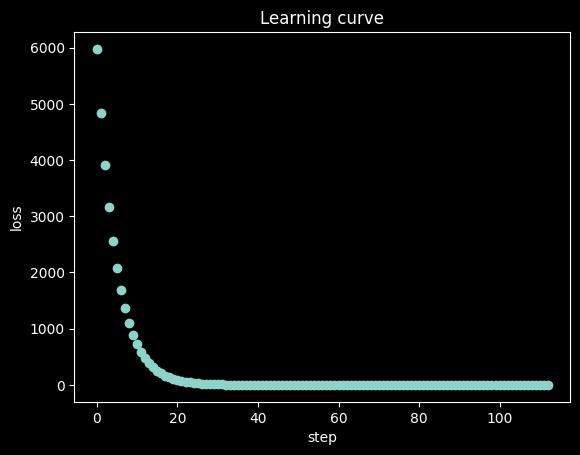

In [6]:
fig, ax = plt.subplots()
ax.scatter(x=list(range(len(loss_history))), y=loss_history)
ax.set_ylabel('loss')
ax.set_xlabel('step')
ax.set_title('Learning curve')
plt.show()